# Classe Principal

In [141]:
import numpy as np
import scipy.special as scipyspec
import matplotlib.pyplot as plt

class Net():
    def __init__(self, input_size, hidden_size, output_size, taxa_de_aprendizagem, biasj, biask):
        self.inodes = input_size
        self.hnodes = hidden_size
        self.onodes = output_size

        self.n = taxa_de_aprendizagem

        np.random.seed(7)
        self.wIH = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.inodes, self.hnodes))
        self.wHO = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.onodes))

        # self.wIH = np.random.normal(0.0, pow(self.inodes, -0.5), (self.inodes, self.hnodes))
        # self.wHO = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.onodes))

        self.fA = lambda z: 1/(1+np.exp(-z))
        self.aux = lambda x: x*(1-x)
        self.bj = biasj
        self.bk = biask

        self.margem_erro = []
        
        if self.bj == 0:
            self.hasBiasj = False
        else:
            self.hasBiasj = True
        
        if self.bk == 0:
            self.hasBiask = False
        else:
            self.hasBiask = True
    
    def train(self, input_list, target_lists, epoch):
        self.epoch = 0  
        self.itr = []
        for self.epoch in range(epoch):
            inputs = np.array(input_list.T, ndmin=2)
            targets = np.array(target_lists.T, ndmin=2)
                
            hidden_inputs = np.dot(self.wIH.T, inputs) + self.bj
            hidden_outputs = self.fA(hidden_inputs)

            final_inputs = np.dot(self.wHO.T, hidden_outputs) + self.bk
            final_outputs = self.fA(final_inputs)
            
            loss = targets - final_outputs
            hidden_loss = np.dot(self.wHO, loss)
            media_absoluta = np.mean(np.abs(loss))
            
            dck = self.aux(final_outputs)
            dck = loss * dck

            dcj = self.aux(hidden_outputs)
            dcj = hidden_loss * dcj

            self.Delta_wHO = self.n * np.dot(dck, hidden_outputs.T)
            self.wHO = self.wHO + self.Delta_wHO.T
            if self.hasBiask == True:
                self.bk = self.bk + self.n * dck

            self.Delta_wIH = self.n * np.dot(dcj, inputs.T)
            self.wIH = self.wIH + self.Delta_wIH.T
            if self.hasBiasj == True:
                self.bj = self.bj + self.n * dcj

            self.margem_erro.append(media_absoluta)
            self.itr.append(self.epoch)

    def predict(self, input_list):
        inputs = np.array(input_list.T, ndmin=2)
        hidden_inputs = np.dot(self.wIH.T, inputs) + self.bj
        hidden_outputs = self.fA(hidden_inputs)

        final_inputs = np.dot(self.wHO.T, hidden_outputs) + self.bk
        final_outputs = self.fA(final_inputs)

        return final_outputs


# Função de Equivalência sem Bias

Resultados apresentados pela RNA da Função de Equivalência: [[0.67492584 0.43024729 0.46674556 0.48606957]]
Resultados esperados: [1, 0, 0, 1]

Pesos sinápticos finais em wIH:
 [[ 1.8566501   0.09776239 -3.5232578 ]
 [-0.61825163 -1.06345684 -3.55274631]]

Pesos sinápticos finais em wOH:
 [[ 0.39250503]
 [-1.31301655]
 [ 2.3816105 ]]


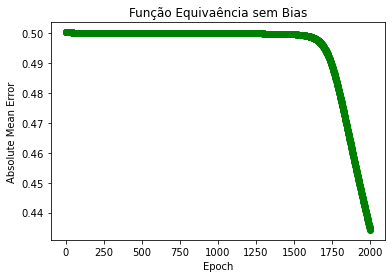

In [142]:
FEinputs = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
FEdesired_outputs = np.array([[1], [0], [0], [1]])

FE = Net(2, 3, 1, 0.2, 0, 0) #Camadas iniciais, Camadas escondidas, Camadas de saída, Taxa de Aprendizagem, Bias
FE.train(FEinputs, FEdesired_outputs, 2000)

print("Resultados apresentados pela RNA da Função de Equivalência:", FE.predict(FEinputs))
print("Resultados esperados:", [1, 0, 0, 1])

print("\nPesos sinápticos finais em wIH:\n", FE.wIH)
print("\nPesos sinápticos finais em wOH:\n", FE.wHO)


plt.xlabel("Epoch")
plt.ylabel("Absolute Mean Error")
plt.title("Função Equivaência sem Bias")
plt.plot(FE.itr, FE.margem_erro, 'go')


plt.show()

# Função NAND sem Bias

Resultados apresentados pela RNA da Função de Equivalência: [[0.97240843 0.97076874 0.94101394 0.07760629]]
Resultados esperados: [1, 1, 1, 0]

Pesos sinápticos finais em wIH:
 [[ 3.11824695 -1.30889155 -8.13614915]
 [-7.59764248  4.3156212   3.7104222 ]]

Pesos sinápticos finais em wOH:
 [[ 4.25951019]
 [-2.7171281 ]
 [ 5.5821492 ]]


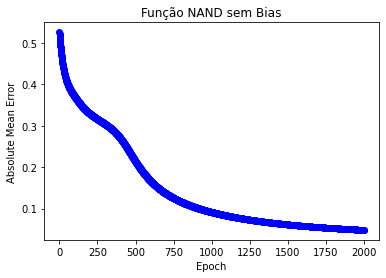

In [143]:
NANDinputs = np.array([[0,0], [1,0], [0,1], [1,1]])
NANDdesired_outputs = np.array([[1], [1], [1], [0]])

NAND = Net(2, 3, 1, 0.2, 0, 0)#Camadas iniciais, Camadas escondidas, Camadas de saída, Taxa de Aprendizagem, Bias
NAND.train(NANDinputs, NANDdesired_outputs, 2000)

print("Resultados apresentados pela RNA da Função de Equivalência:", NAND.predict(NANDinputs))
print("Resultados esperados:", [1, 1, 1, 0])

print("\nPesos sinápticos finais em wIH:\n", NAND.wIH)
print("\nPesos sinápticos finais em wOH:\n", NAND.wHO)

plt.xlabel("Epoch")
plt.ylabel("Absolute Mean Error")
plt.title("Função NAND sem Bias")
plt.plot(NAND.itr, NAND.margem_erro, 'bo')
plt.show()

# Função de Equivalência com Bias

Resultados apresentados pela RNA da Função de Equivalência: [[0.97947872 0.01967742 0.01957869 0.97851339]]
Resultados esperados: [1, 0, 0, 1]

Pesos sinápticos finais em wIH:
 [[ 0.93945016 -0.31732409 -0.21647912]
 [ 0.34052943 -0.41414746 -0.22331149]]

Pesos sinápticos finais em wOH:
 [[-0.1487625 ]
 [-2.72171114]
 [ 1.81473531]]

Bias camada j:
 [[-0.15720464  0.84745091  0.98927601  0.11597378]
 [-3.47177399  3.82116445  3.91081694 -2.86947948]
 [ 3.00108627 -2.59818279 -2.58725899  3.36275495]]

Bias camada k: [[ 2.28734041 -1.24135911 -1.25722084  2.28803675]]


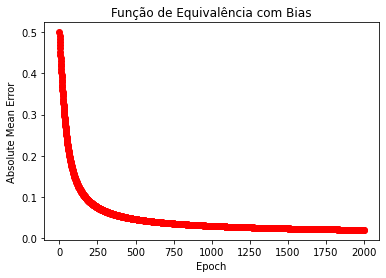

In [144]:
FEBinputs = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
FEBdesired_outputs = np.array([[1], [0], [0], [1]])

bj = [[0.5], [0.5], [0.5]]
bk = 0.5

FEB = Net(2, 3, 1, 0.2, bj, bk) #Camadas iniciais, Camadas escondidas, Camadas de saída, Taxa de Aprendizagem, Bias

FEB.train(FEBinputs, FEBdesired_outputs, 2000)

print("Resultados apresentados pela RNA da Função de Equivalência:", FEB.predict(FEBinputs))
print("Resultados esperados:", [1, 0, 0, 1])

print("\nPesos sinápticos finais em wIH:\n", FEB.wIH)
print("\nPesos sinápticos finais em wOH:\n", FEB.wHO)
print("\nBias camada j:\n", FEB.bj)
print("\nBias camada k:", FEB.bk)

plt.xlabel("Epoch")
plt.ylabel("Absolute Mean Error")
plt.title("Função de Equivalência com Bias")
plt.plot(FEB.itr, FEB.margem_erro, 'ro')
plt.show()

# Função NAND com Bias

Resultados apresentados pela RNA da Função NANDB: [[0.98459613 0.98469455 0.98441747 0.02521918]]
Resultados esperados: [1, 1, 1, 0]

Pesos sinápticos finais em wIH:
 [[ 0.22643883 -0.13838392 -0.38599579]
 [-0.30979589 -0.24805557 -0.38628204]]

Pesos sinápticos finais em wOH:
 [[ 0.40572144]
 [-1.72758676]
 [ 2.43415486]]

Bias camada j:
 [[ 1.31976541  1.11758025  1.32209137 -0.86716689]
 [-2.54251692 -2.46387463 -2.38707043  3.59449978]
 [ 3.13758084  3.45787347  3.47534339 -2.86281799]]

Bias camada k: [[ 1.63050054  1.63515159  1.63578984 -2.1698337 ]]


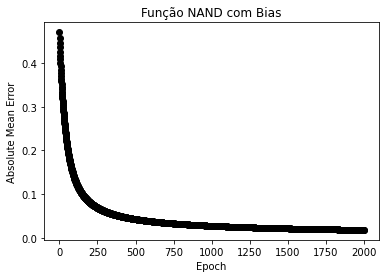

In [145]:
NANDBinputs = np.array([[0,0], [1,0], [0,1], [1,1]])
NANDBdesired_outputs = np.array([[1], [1], [1], [0]])

NANDB = Net(2, 3, 1, 0.2, bj, bk)
NANDB.train(NANDBinputs, NANDBdesired_outputs, 2000)

print("Resultados apresentados pela RNA da Função NANDB:", NANDB.predict(NANDBinputs))
print("Resultados esperados:", [1, 1, 1, 0])

print("\nPesos sinápticos finais em wIH:\n", NANDB.wIH)
print("\nPesos sinápticos finais em wOH:\n", NANDB.wHO)
print("\nBias camada j:\n", NANDB.bj)
print("\nBias camada k:", NANDB.bk)

plt.xlabel("Epoch")
plt.ylabel("Absolute Mean Error")
plt.title("Função NAND com Bias")
plt.plot(NANDB.itr, NANDB.margem_erro, 'ko')
plt.show()

# Gráfico Geral

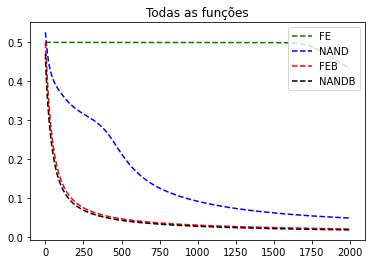

In [146]:
plt.plot(FE.itr, FE.margem_erro, 'g--', label='FE')
plt.plot(NAND.itr, NAND.margem_erro, 'b--', label='NAND')
plt.plot(FEB.itr, FEB.margem_erro, 'r--', label='FEB')
plt.plot(NANDB.itr, NANDB.margem_erro, 'k--', label='NANDB')
plt.legend(loc="upper right")
plt.title('Todas as funções')
plt.show()
